In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set()

In [54]:
data = pd.read_csv('StudentsPerformance.csv')

In [55]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


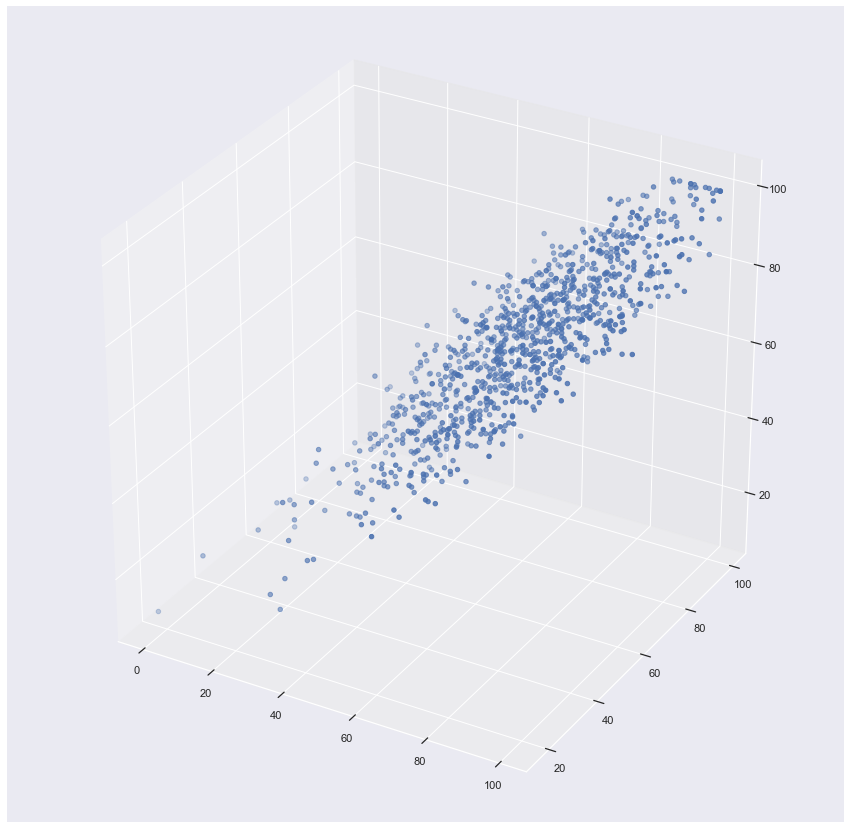

In [56]:
x = data['math score']
y = data['reading score']
z = data['writing score']
fig = plt.figure(figsize = (15, 15)) 
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z)
plt.show()

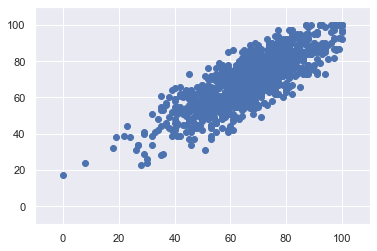

In [57]:
plt.scatter(data['math score'],data['reading score'])
plt.xlim(-10,110)
plt.ylim(-10,110)
plt.show()

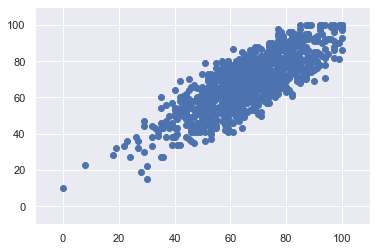

In [58]:
plt.scatter(data['math score'],data['writing score'])
plt.xlim(-10,110)
plt.ylim(-10,110)
plt.show()

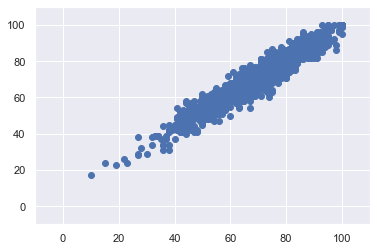

In [59]:
plt.scatter(data['writing score'],data['reading score'])
plt.xlim(-10,110)
plt.ylim(-10,110)
plt.show()

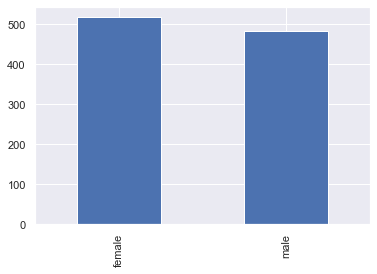

In [60]:
data['gender'].value_counts().plot.bar()

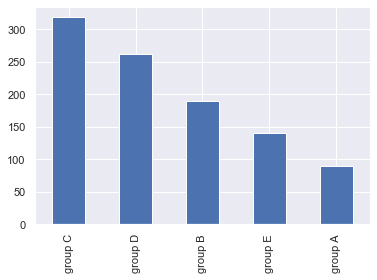

In [61]:
data['race/ethnicity'].value_counts().plot.bar()

In [62]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
scaler = StandardScaler()
label = LabelEncoder()

In [63]:
data['gender'] = label.fit_transform(data['gender'])
data['race/ethnicity'] = label.fit_transform(data['race/ethnicity'])
data['parental level of education'] = label.fit_transform(data['parental level of education'])
data['lunch'] = label.fit_transform(data['lunch'])
data['test preparation course'] = label.fit_transform(data['test preparation course'])
data['math score'] = label.fit_transform(data['math score'])
data['reading score'] = label.fit_transform(data['reading score'])
data['writing score'] = label.fit_transform(data['writing score'])

In [64]:
K_data = data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis = 1)
K_data

,math score,reading score,writing score
0,52,44,50
1,49,62,64
2,70,67,69
3,27,29,20
4,56,50,51
...,...,...,...
995,68,70,71
996,42,27,31
997,39,43,41
998,48,50,53


In [65]:
scaled_data = scaler.fit_transform(K_data)


In [66]:
scaled_data

array([[ 0.39103263,  0.19394105,  0.3921326 ],
       [ 0.19067432,  1.44607125,  1.323248  ],
       [ 1.59318246,  1.79388519,  1.65578922],
       ...,
       [-0.4771867 ,  0.12437827, -0.20644159],
       [ 0.12388822,  0.61131778,  0.59165733],
       [ 0.72496313,  1.16782009,  1.19023152]])

KMEANS

In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(5)

In [69]:
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
scaled_data_clusters = kmeans.fit_predict(scaled_data)

In [71]:
scaled_data_clusters

array([3, 0, 0, 1, 3, 3, 0, 4, 2, 1, 1, 4, 3, 3, 1, 3, 0, 4, 4, 1, 2, 2,
       1, 3, 3, 3, 1, 2, 2, 2, 3, 2, 2, 4, 0, 3, 3, 1, 0, 1, 1, 2, 1, 2,
       1, 1, 2, 3, 2, 0, 1, 3, 4, 3, 3, 4, 0, 1, 1, 4, 3, 4, 1, 3, 1, 2,
       4, 2, 1, 1, 2, 1, 4, 1, 4, 4, 4, 3, 2, 2, 1, 4, 1, 2, 4, 3, 0, 3,
       2, 3, 2, 4, 3, 4, 0, 3, 2, 2, 2, 2, 2, 3, 0, 1, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 0, 3, 3, 3, 1, 2, 0, 0, 0, 1, 3, 0, 2, 3, 3, 1, 0, 4,
       3, 3, 3, 1, 1, 1, 2, 2, 3, 2, 1, 1, 3, 4, 0, 2, 3, 0, 2, 2, 2, 1,
       2, 0, 3, 1, 3, 2, 3, 0, 1, 1, 0, 0, 1, 2, 3, 2, 3, 0, 3, 2, 1, 0,
       1, 3, 2, 0, 2, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 3, 2, 2, 3, 1, 2, 1,
       1, 3, 3, 3, 3, 2, 4, 3, 2, 3, 3, 2, 3, 4, 1, 1, 0, 3, 0, 4, 3, 1,
       2, 3, 2, 3, 2, 1, 3, 1, 2, 0, 2, 4, 3, 0, 0, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 3, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 3, 3, 3, 3, 3, 1, 0,
       3, 4, 3, 3, 0, 3, 2, 1, 1, 2, 0, 3, 0, 2, 3, 2, 1, 4, 3, 3, 4, 3,
       0, 3, 3, 3, 3, 3, 1, 3, 3, 2, 4, 3, 4, 0, 3,

In [72]:
data_with_clusters = K_data.copy()
data_with_clusters['Cluster'] = scaled_data_clusters
data_with_clusters

,math score,reading score,writing score,Cluster
0,52,44,50,3
1,49,62,64,0
2,70,67,69,0
3,27,29,20,1
4,56,50,51,3
...,...,...,...,...
995,68,70,71,0
996,42,27,31,1
997,39,43,41,2
998,48,50,53,3


In [73]:
kmeans.cluster_centers_

array([[ 1.32968093,  1.41613817,  1.40063941],
       [-0.84601445, -0.92940398, -0.93923061],
       [-0.13613561, -0.14645627, -0.10692374],
       [ 0.51434928,  0.57588505,  0.55230039],
       [-1.78222322, -1.90892324, -1.90509806]])

In [74]:
kmeans.score(scaled_data)

-479.28547510736007

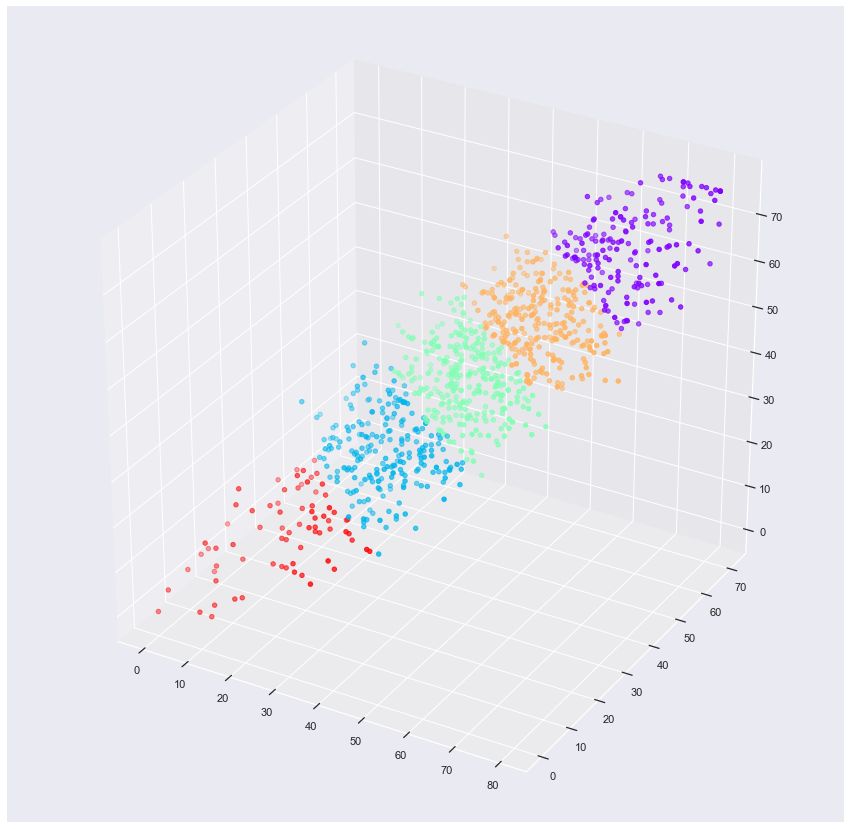

In [75]:
x = data_with_clusters['math score']
y = data_with_clusters['reading score']
z = data_with_clusters['writing score']
fig = plt.figure(figsize = (15, 15)) 
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

In [76]:
kmeans.inertia_

479.2854751073601

In [77]:
SSE = []


In [78]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = 'k-means++')
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

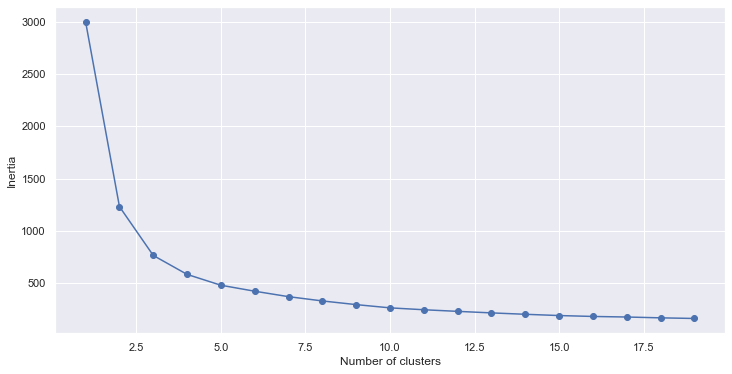

In [79]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

HIERARCHIAL

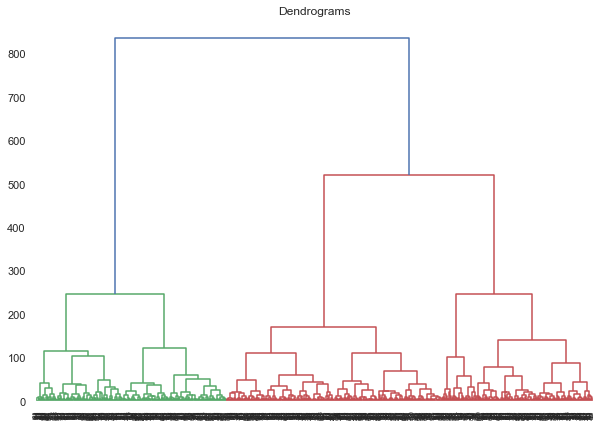

In [80]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_with_clusters, method='ward'))

In [81]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_with_clusters)

array([0, 4, 4, 1, 2, 2, 4, 3, 0, 1, 1, 3, 2, 0, 1, 0, 4, 3, 3, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 4, 2, 2, 1, 4, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 3, 4, 1, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 1, 1, 0, 0, 3, 1, 3, 3, 3, 2, 0, 0, 1, 3, 1, 0, 3, 2, 4, 0,
       0, 2, 0, 3, 0, 1, 4, 2, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 0, 0, 0,
       4, 1, 1, 1, 4, 2, 2, 2, 1, 0, 4, 4, 4, 1, 2, 4, 0, 0, 2, 1, 4, 3,
       2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 3, 4, 0, 2, 4, 0, 0, 0, 1,
       0, 4, 0, 0, 2, 0, 2, 4, 1, 1, 4, 4, 1, 0, 2, 0, 0, 4, 2, 0, 1, 4,
       1, 2, 0, 4, 0, 1, 1, 0, 1, 0, 0, 0, 1, 4, 0, 2, 0, 0, 2, 1, 0, 1,
       1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 3, 1, 1, 4, 2, 4, 3, 0, 1,
       0, 4, 0, 2, 0, 1, 0, 1, 0, 4, 0, 3, 2, 4, 2, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 4,
       0, 1, 2, 0, 4, 0, 0, 1, 1, 0, 4, 2, 4, 0, 2, 0, 1, 1, 2, 2, 3, 2,
       4, 2, 2, 2, 0, 2, 0, 0, 2, 0, 3, 0, 1, 4, 2,

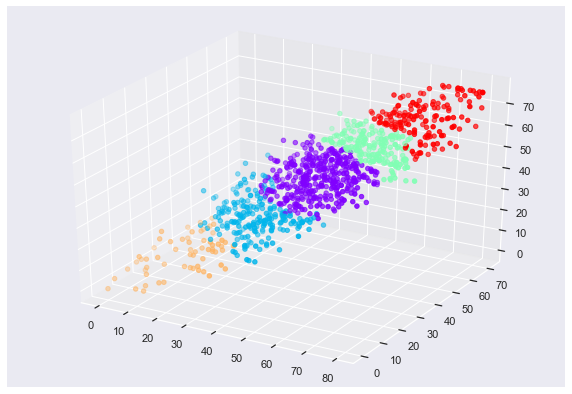

In [82]:
x = data_with_clusters['math score']
y = data_with_clusters['reading score']
z = data_with_clusters['writing score']
plt.figure(figsize=(10, 7))  
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c=cluster.labels_, cmap = 'rainbow')
plt.show()

DBSCAN

In [83]:
from sklearn.cluster import DBSCAN

In [84]:
dbscan = DBSCAN(eps=0.005, min_samples = 3)
scan_clusters = dbscan.fit_predict(data_with_clusters)

In [85]:
db_labels = dbscan.labels_
db_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

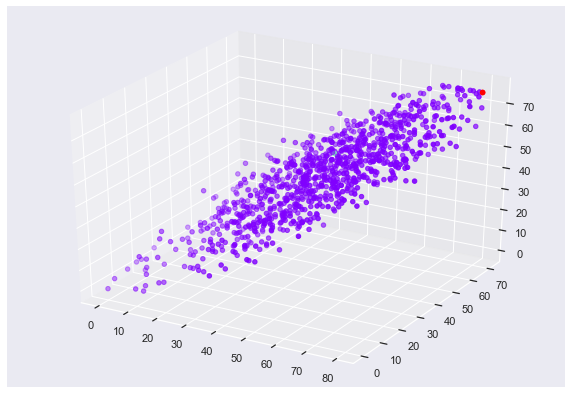

In [86]:
x = data_with_clusters['math score']
y = data_with_clusters['reading score']
z = data_with_clusters['writing score']
plt.figure(figsize=(10, 7))  
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c=scan_clusters, cmap = 'rainbow')
plt.show()